In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas_datareader import data

In [4]:
from pandas_datareader import DataReader

In [5]:
from datetime import datetime

In [6]:
from __future__ import division

In [7]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [8]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

In [9]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)
    
    # globals() makes every string from list as global variables ex. AAPL

In [10]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-18,79.937500,78.652496,78.839996,79.750000,152531200.0,79.136566
2020-02-19,81.142502,80.000000,80.000000,80.904999,93984000.0,80.282684
2020-02-20,81.162498,79.552498,80.657501,80.074997,100566000.0,79.459068
2020-02-21,80.112503,77.625000,79.654999,78.262497,129554000.0,77.660507
2020-02-24,76.044998,72.307503,74.315002,74.544998,222195200.0,73.971603
...,...,...,...,...,...,...
2021-02-11,136.389999,133.770004,135.899994,135.130005,64154400.0,135.130005
2021-02-12,135.529999,133.690002,134.350006,135.369995,60029300.0,135.369995
2021-02-16,136.009995,132.789993,135.490005,133.190002,80206200.0,133.190002


In [11]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,103.653268,100.652559,102.177717,102.203248,1.538847e+08,101.833892
std,24.316284,23.890267,24.297410,24.091967,7.156592e+07,24.205433
min,57.125000,53.152500,57.020000,56.092499,4.669130e+07,55.661041
25%,79.926250,78.698748,79.175623,79.280626,1.028072e+08,78.883764
50%,112.320000,108.813751,110.451248,110.389999,1.363478e+08,110.035450
75%,123.365002,119.642502,121.007502,121.632500,1.842475e+08,121.398909
max,145.089996,141.369995,143.600006,143.160004,4.268848e+08,142.946396


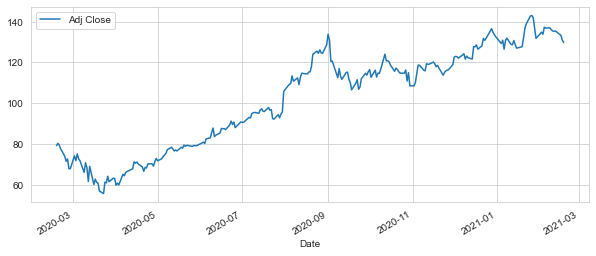

In [12]:
AAPL['Adj Close'].plot(legend = True, figsize = (10,4))

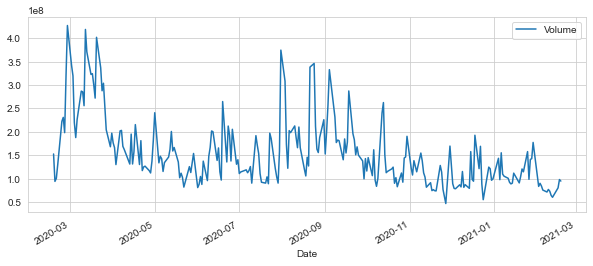

In [13]:
AAPL['Volume'].plot(legend = True, figsize = (10,4))

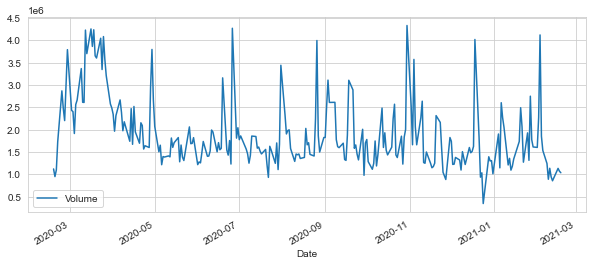

In [14]:
GOOG['Volume'].plot(legend = True, figsize = (10,4))

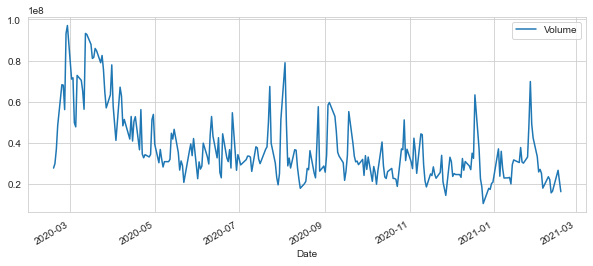

In [15]:
MSFT['Volume'].plot(legend = True, figsize = (10,4))

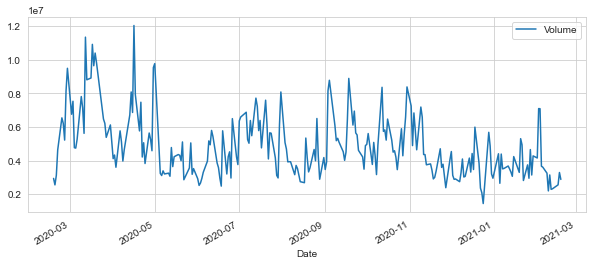

In [16]:
AMZN['Volume'].plot(legend = True, figsize = (10,4))

In [17]:
ma_day = [10, 20, 50]

for ma in ma_day:
    
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

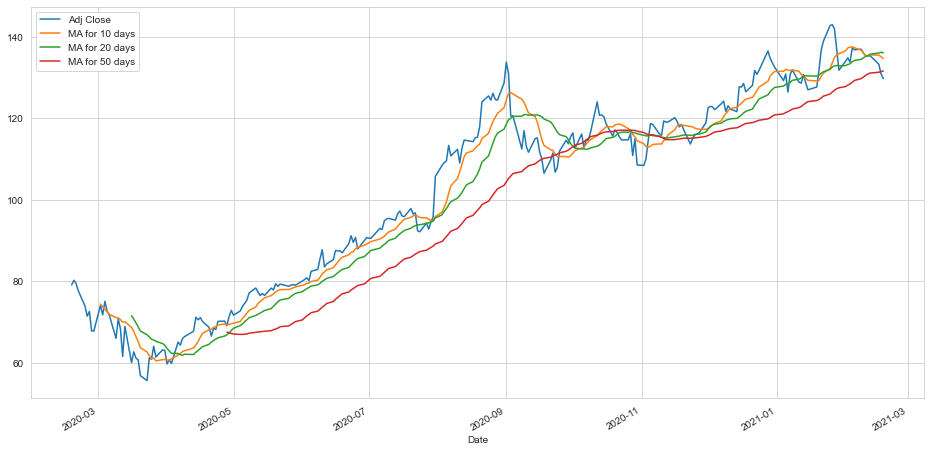

In [18]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (16,8))

In [19]:
for ma in ma_day:
    
    column_name = "MA for %s days" %(str(ma))
    
    GOOG[column_name] = GOOG['Adj Close'].rolling(ma).mean()

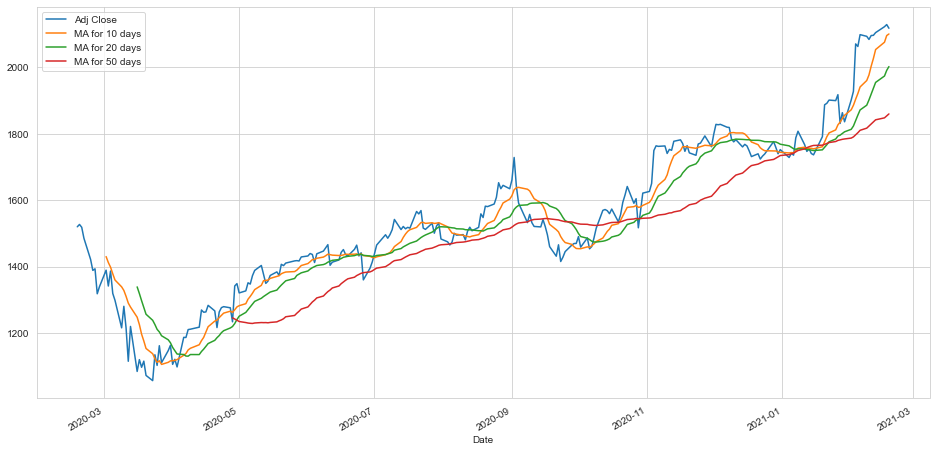

In [20]:
GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (16,8))

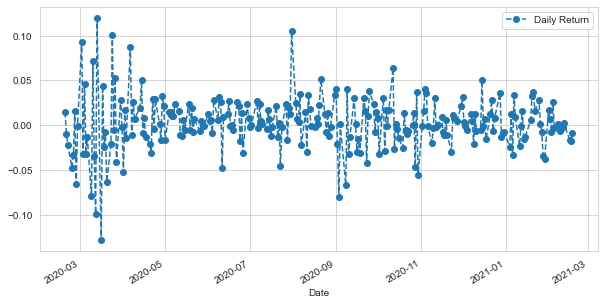

In [21]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,5), legend = True, linestyle = '--', marker='o')

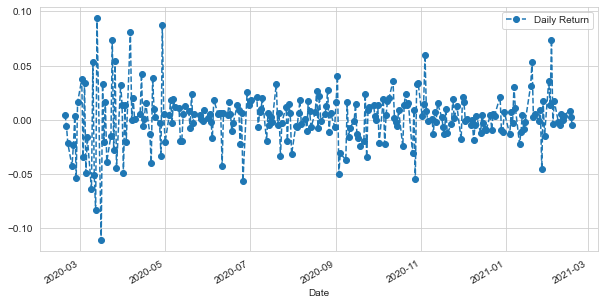

In [22]:
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()

GOOG['Daily Return'].plot(figsize=(10,5), legend = True, linestyle = '--', marker='o')

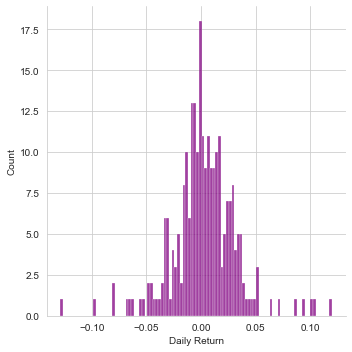

In [23]:
sns.displot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

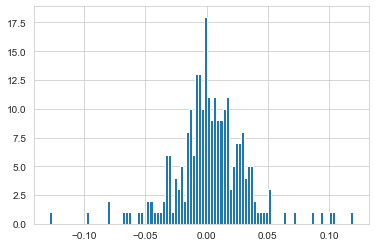

In [24]:
AAPL['Daily Return'].hist(bins= 100)

In [25]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [26]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-02-18,79.136566,1519.670044,184.841644,2155.669922
2020-02-19,80.282684,1526.689941,185.395981,2170.219971
2020-02-20,79.459068,1518.150024,182.564758,2153.100098
2020-02-21,77.660507,1485.109985,176.793411,2095.969971
2020-02-24,73.971603,1421.589966,169.170883,2009.290039


In [27]:
tech_rets = closing_df.pct_change()

In [28]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-02-18,NaN,NaN,NaN,NaN
2020-02-19,0.014483,0.004619,0.002999,0.006750
2020-02-20,-0.010259,-0.005594,-0.015271,-0.007889
2020-02-21,-0.022635,-0.021763,-0.031613,-0.026534
2020-02-24,-0.047500,-0.042771,-0.043115,-0.041356


C:\Users\jaimi\anaconda3\envs\pandas_playground\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


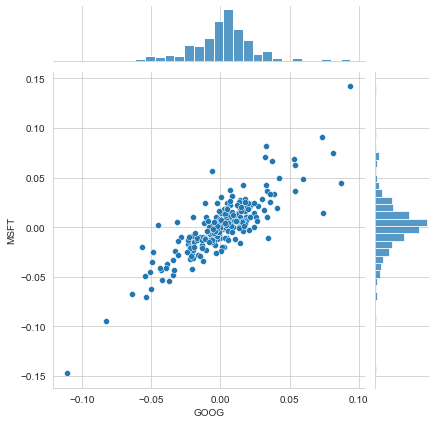

In [29]:
sns.jointplot('GOOG','MSFT', tech_rets, kind = 'scatter')

# comparsion of 4 stocks. shows corelation. pairplot

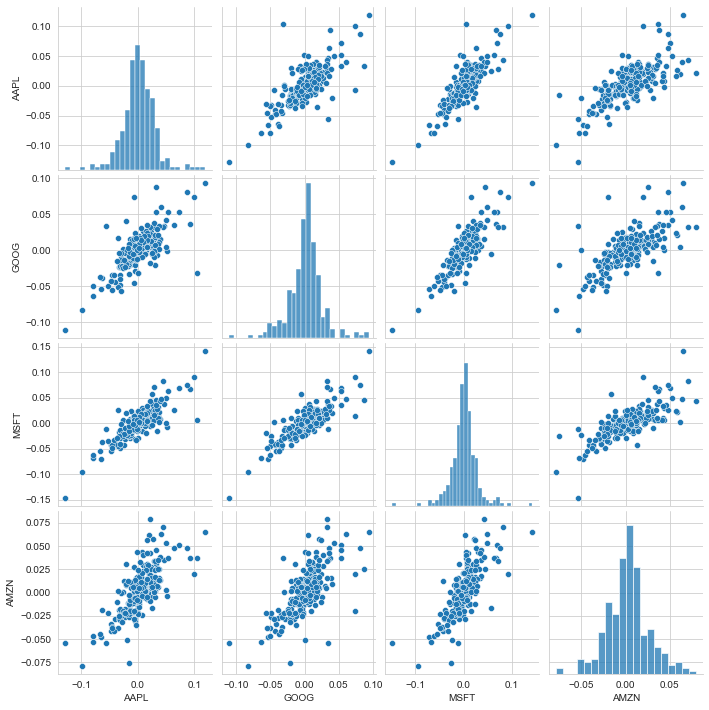

In [30]:
sns.pairplot(tech_rets.dropna())

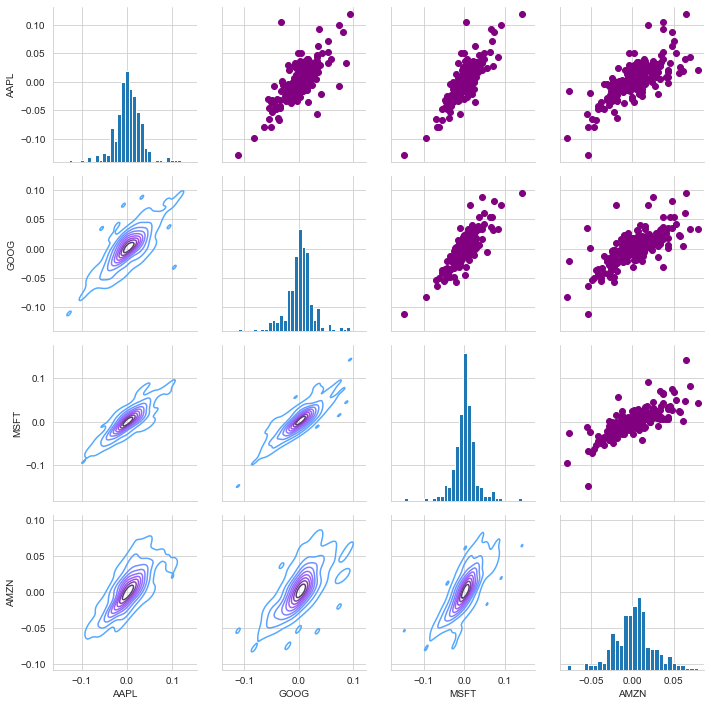

In [31]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins = 30)

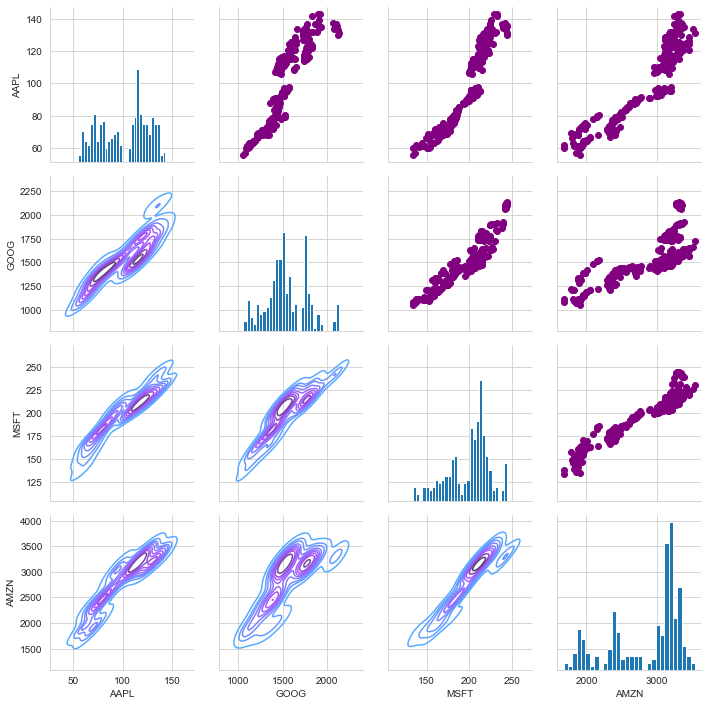

In [32]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins = 30)

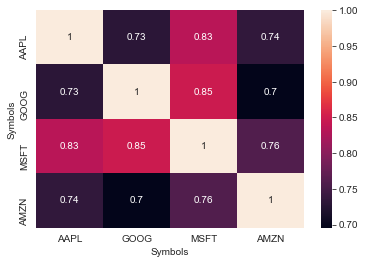

In [33]:
sns.heatmap(data = tech_rets.corr(), annot=True)

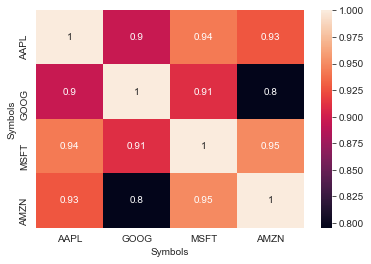

In [34]:
sns.heatmap(data = closing_df.corr(), annot=True)

In [35]:
### Risk Analysis

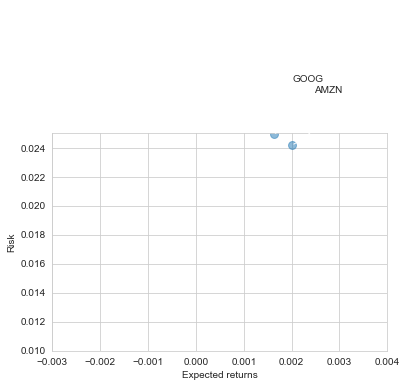

In [36]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))